# Sentiment Analysis with RNN

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Understanding-RNN" data-toc-modified-id="Understanding-RNN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Understanding RNN</a></span></li><li><span><a href="#Step-1:-Import-Libraries" data-toc-modified-id="Step-1:-Import-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step 1: Import Libraries</a></span></li><li><span><a href="#Prepare-the--data" data-toc-modified-id="Prepare-the--data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare the  data</a></span><ul class="toc-item"><li><span><a href="#Set-the-vocabulary-size-and-load-in-training-and-test-data" data-toc-modified-id="Set-the-vocabulary-size-and-load-in-training-and-test-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Set the vocabulary size and load in training and test data</a></span></li><li><span><a href="#Inspect-a-sample-review-and-its-label" data-toc-modified-id="Inspect-a-sample-review-and-its-label-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Inspect a sample review and its label</a></span></li><li><span><a href="#Maximum-review-length-and-minimum-review-length" data-toc-modified-id="Maximum-review-length-and-minimum-review-length-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Maximum review length and minimum review length</a></span></li><li><span><a href="#Pad-sequences" data-toc-modified-id="Pad-sequences-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Pad sequences</a></span></li></ul></li><li><span><a href="#Build-the-RNN-model" data-toc-modified-id="Build-the-RNN-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build the RNN model</a></span></li><li><span><a href="#Train-and-evaluate-our-model" data-toc-modified-id="Train-and-evaluate-our-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train and evaluate our model</a></span></li><li><span><a href="#Test-the-model" data-toc-modified-id="Test-the-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Test the model</a></span></li></ul></div>

## Understanding RNN

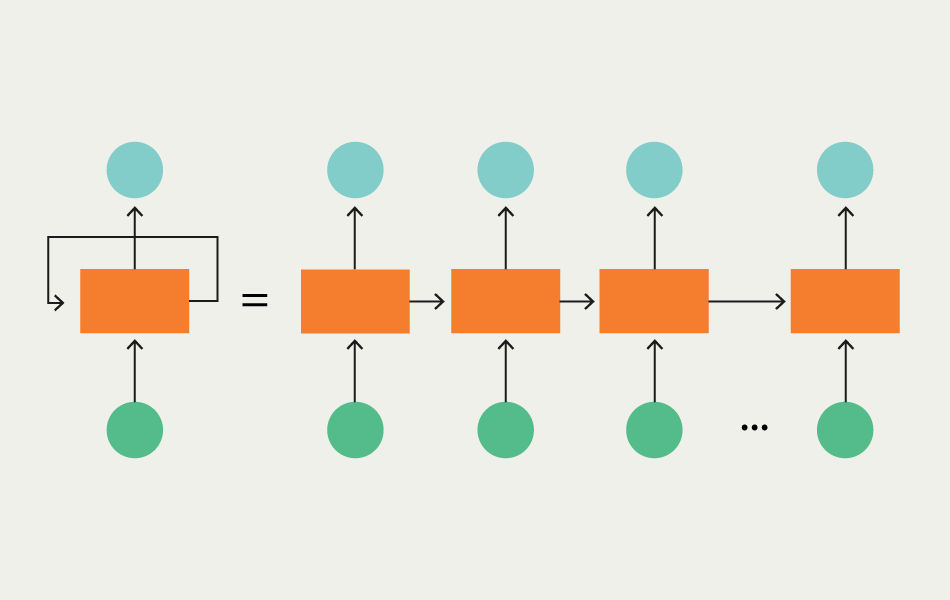

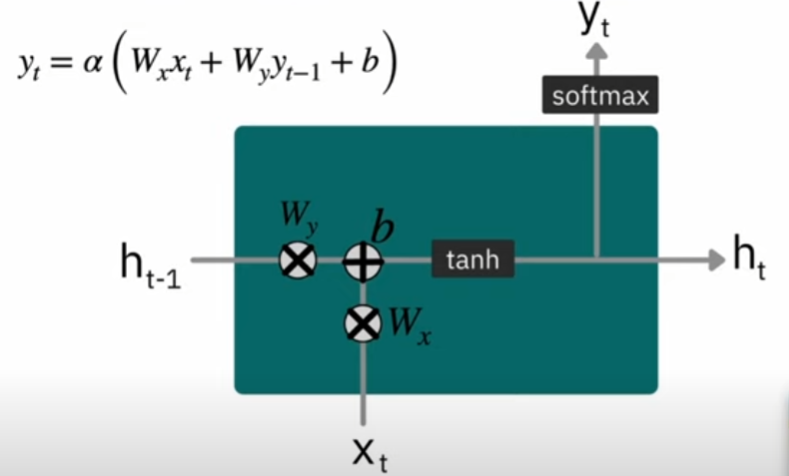

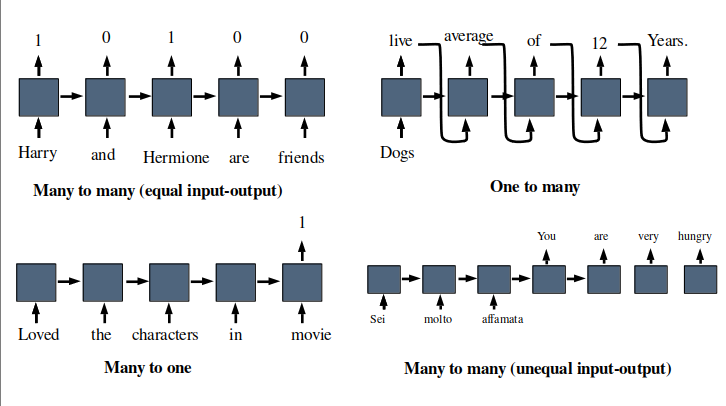

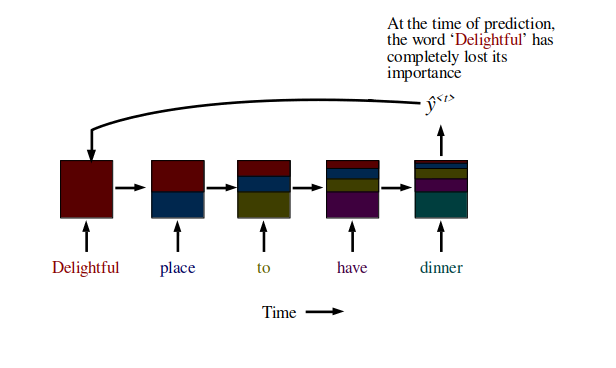

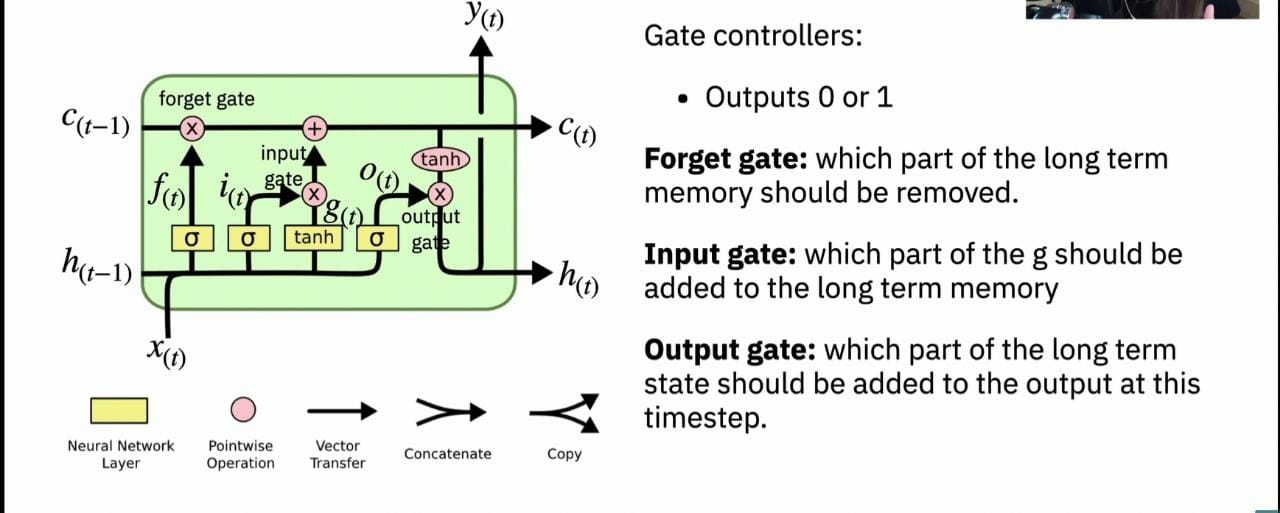

## Step 1: Import Libraries 

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

## Prepare the  data

### Set the vocabulary size and load in training and test data

In [2]:
vocabulary_size = 50000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


### Inspect a sample review and its label

In [3]:
print("------------------Review-----------------")
print(X_train[2])
print("------------------Label-----------------")
print(y_train[2])

------------------Review-----------------
[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 44076, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 2, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]
------------------Label-----------------
0


- The review is stored as a sequence of integers. These are word IDs that have been pre-assigned to individual words.
- The label is an integer (0 for negative, 1 for positive).

In [4]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('-----------------Review with words----------------------')
print([id2word.get(i, ' ') for i in X_train[6]])
print('-----------------Label----------------------')
print(y_train[2])

-----------------Review with words----------------------
['the', 'boiled', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'murdering', 'naschy', 'br', 'villain', 'council', 'suggestion', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'echoed', 'concentrates', 'concept', 'issue', 'skeptical', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'rocketed', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', "captain's", 'starship', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'originals', 'things', 'is', 'far', 'this', 'make', 'mistakes', "kevin's", 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'dose', 'movies', 'get', 'are', 'and', 'br', 'yes', 

### Maximum review length and minimum review length

In [5]:
print('Maximum review length: {}'.format(len(max((X_train + X_test), key=len))))
print('Minimum review length: {}'.format(len(min((X_test + X_test), key=len))))

Maximum review length: 2697
Minimum review length: 14


### Pad sequences

In [6]:
from tensorflow.keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

## Build the RNN model

In [7]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, GRU, SimpleRNNCell
embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
#model.add(GRU(100))
#model.add(RNN(SimpleRNNCell(100)))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           1600000   
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,653,301
Trainable params: 1,653,301
Non-trainable params: 0
_________________________________________________________________
None


## Train and evaluate our model

In [8]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [9]:
batch_size = 64
num_epochs = 3
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/3
390/390 [==============================] - 274s 697ms/step - loss: 0.4320 - accuracy: 0.7935 - val_loss: 0.2237 - val_accuracy: 0.9219
Epoch 2/3
390/390 [==============================] - 293s 753ms/step - loss: 0.2872 - accuracy: 0.8779 - val_loss: 0.1365 - val_accuracy: 0.9531
Epoch 3/3
390/390 [==============================] - 308s 789ms/step - loss: 0.1604 - accuracy: 0.9424 - val_loss: 0.2089 - val_accuracy: 0.9062


## Test the model

In [10]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.870199978351593


useful links: https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks